# Модель сапасы және оптимизация
Метрикалар, кросс-валидация, гиперпараметрлерді іріктеу (Grid Search, Random Search, Optuna), теңгерімсіз кластармен жұмыс (SMOTE, class_weight), оптимизация

## Task 1 
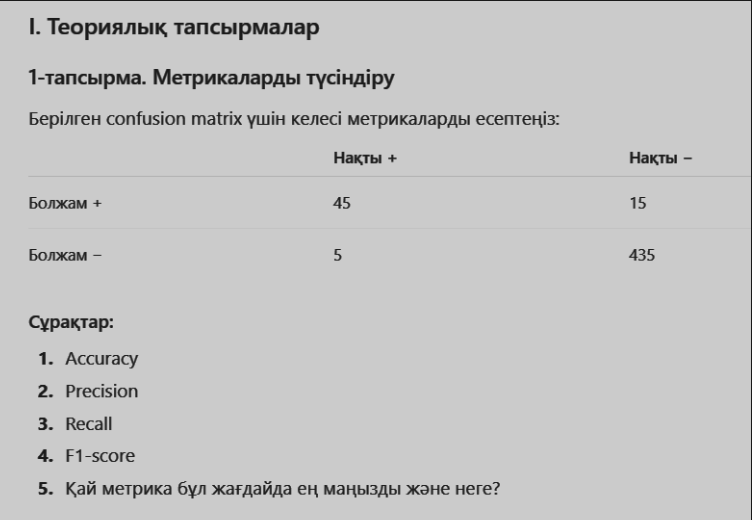

### Жауаптар

<img src="IMG_20260208_131213.jpg" width="700">

<!-- ![alt text](IMG_20260208_131213.jpg) -->

## Task 2. 
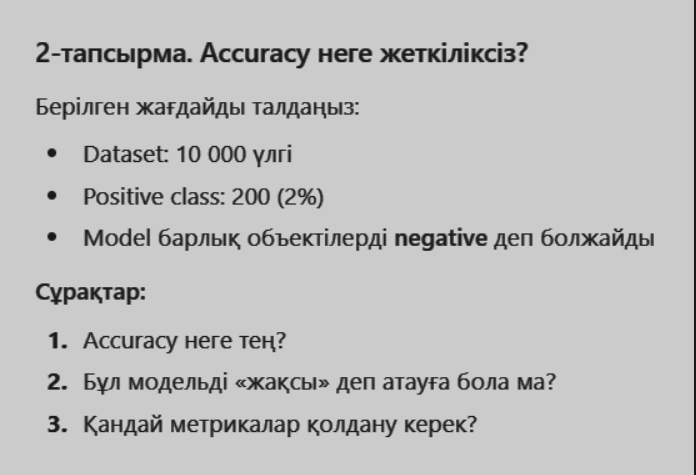

## Task 3

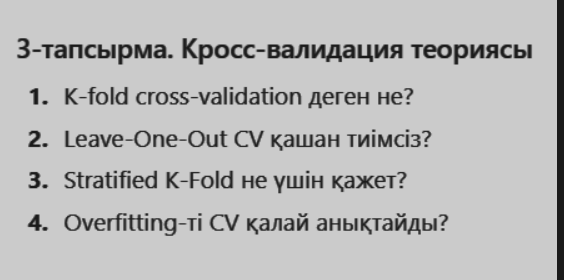

### 1.
<img src="https://miro.medium.com/v2/resize:fit:885/1*L90fdYb2oT0BOP2CCMSIbg.png" width="700">

### 2. 
Бұл әдіс деректер қоры өте үлкен болғанда тиімсіз. Себебі, егер сізде $N$ үлгі болса, модельді $N$ рет қайта оқыту керек. Бұл есептеу ресурстарын (уақыт пен жадты) тым көп талап етеді.

### 3. 
Деректерде кластар теңгерімсіз болғанда (мысалы, 2-тапсырмадағыдай) қажет. Ол әрбір бөліктегі (fold) кластардың арақатынасын жалпы деректердегідей деңгейде сақтайды. Бұл модельдің сирек кластарды дұрыс үйренуіне көмектеседі.

### 4.
Егер модель оқыту деректерінде (training set) өте жоғары нәтиже көрсетіп, ал кросс-валидация кезінде (validation score) нәтижесі айтарлықтай төмен болса, бұл модельдің overfitting-ке (қайта оқыту/жаттап алу) ұшырағанын білдіреді.

## Task 4 
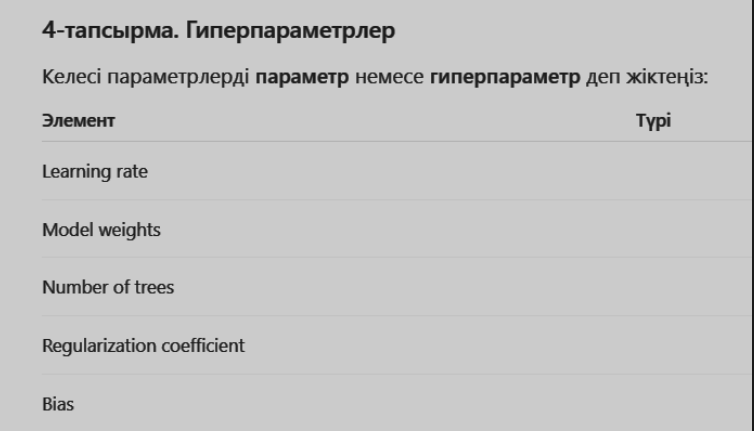

## Task 5 
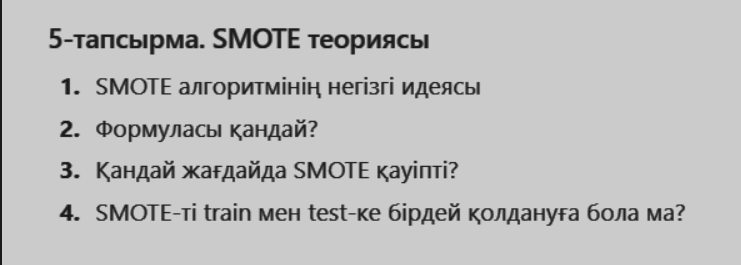

(Synthetic Minority Over-sampling Technique)

1. SMOTE жаңа, синтетикалық мысалдар жасайды. Ол кішігірім сыныптан нүктені таңдап, оның жақын көршілерін тауып, олардың арасындағы сызықтарға жаңа нүктелер салады.

2. $X_{new}$ Новая жаңа нүктесі келесідей есептеледі: $$x_{new} = x_i + \lambda \cdot (x_{zi} - x_i)$$
    - $x_i$ меньш-кіші сыныптың бастапқы нүктесі. 
    - $x_{zi}$ - оның ең жақын көршілерінің бірі.
    - $\Lambda$ - 0-ден 1-ге дейінгі кездейсоқ Сан.

3. 
 - Деректерде шум коп болганда. 
 - Сыныптардың қабаттасуы( Overlapping): егер сыныптар арасындағы шекаралар бұлыңғыр болса, SMOTE бір сыныптың нүктелерін екіншісінің аумағының тікелей "ішінде" жасай алады, нәтижесінде жіктеу қателері пайда болады. 

4. Болмайды. Егер сіз оны сынақ үлгісіне (test) қолдансаңыз, сіз модельді жасанды деректерге тексересіз, ол оны құру кезінде өзі "тексере" алады. Бұл жеткіліксіз нәтижелерге әкеледі және нақты деректерде модельдің нақты жұмысын көрсетпейді.

## Task 6 

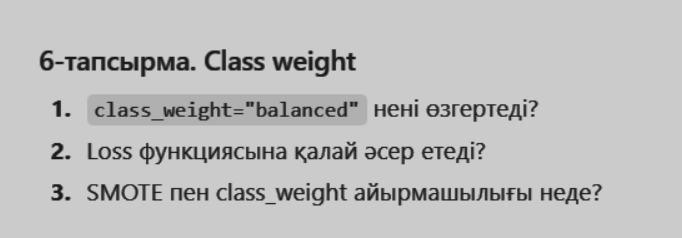

1. Бұл параметр автоматты түрде сыныптарға салмақтарды олардың деректердегі жиілігіне кері пропорционалды түрде тағайындайды. Егер бір класс екіншісіне қарағанда 10 есе аз болса, модель ондағы қатені 10 есе "ауыр"деп санайды. Бұл алгоритмді сирек кездесетін сыныпқа көбірек көңіл бөлуге мәжбүр етеді.

2. Шығын функциясына әр класс үшін мультипликатор (вес w_c вес салмағы) қосылады. Сирек сыныптағы қате үлкен салмаққа, ал жиі — кіші салмаққа көбейтіледі.
$$Loss = \sum w_c \cdot Loss(y_{true}, y_{pred})$$

3. 

**SMOTE:** жаңа синтетикалық мысалдар жасау арқылы деректер жиынын физикалық түрде өзгертеді.

**Class weight:** деректер өзгермейді, бірақ оқу кезінде алгоритм математикасындағы қателердің "маңыздылығын" өзгертеді.

## Task 7 
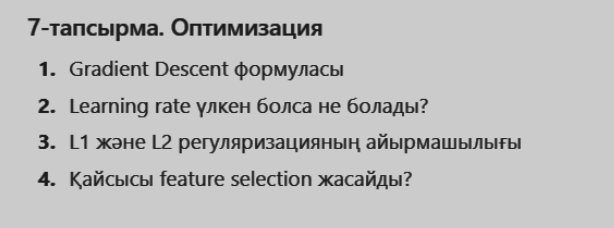

1. Бұл қатені азайту үшін модель салмағын жаңарту әдісі:
$$\theta_{new} = \theta_{old} - \eta \cdot \nabla J(\theta)$$

2. Алгоритм тым "кең қадамдар" жасайды. Ол қатенің ең төменгі нүктесінен секіріп, оның айналасында шексіз тербеле бастайды немесе оңтайлы шешім таба алмай, шексіздікке (алшақтыққа) барады.

3. 
- **L1 (Lasso)**: айыппұлға абсолютті салмақ мәндерін қосады ($|\theta|$). Ол маңызды емес белгілердің салмағын нөлге түсіруге тырысады.
- **L2 (Ridge)**: таразы квадраттарын қосады ($\theta^2$). Ол салмақты кішкентай етеді, бірақ оларды сирек толығымен толтырады.

4. Бұны L1 регуляризациясын жасайды. Артық белгілердің алдында коэффициенттерді алып тастайтындығына байланысты, ол оларды модельден "лақтырады", тек ең маңыздыларын қалдырады.

# II. Practice (Python / Colab)

## Task 8
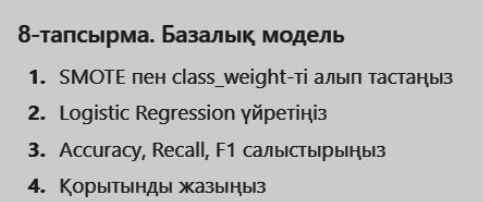

In [14]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, recall_score, f1_score, classification_report 
from sklearn.datasets import fetch_openml 

diabetes = fetch_openml(name='diabetes', version=1, as_frame=True, parser='auto')
X = diabetes.data 
y = (diabetes.target == 'tested_positive').astype(int)

In [4]:
print("Деректер жиынтығының өлшемі:", X.shape)
print("Белгілер (features):", list(X.columns[:5]))

Деректер жиынтығының өлшемі: (768, 8)
Белгілер (features): ['preg', 'plas', 'pres', 'skin', 'insu']


In [5]:
X

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [9]:
print(y.nunique())
print(y.unique())

2
[1 0]


class
0    500
1    268
Name: count, dtype: int64


C:\Users\jekim\AppData\Local\Temp\ipykernel_1268\692442979.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


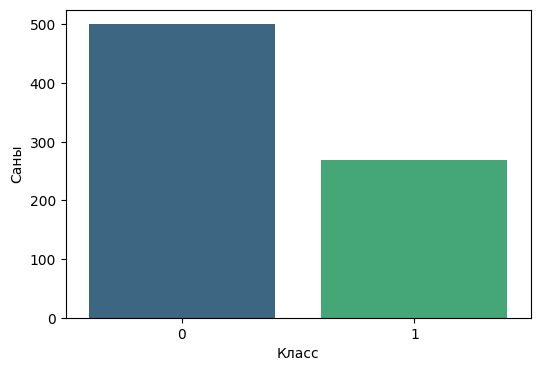

Класс 0 үлесі: 65.10%
Класс 1 үлесі: 34.90%


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Кластардың санын есептеу
class_counts = y.value_counts()
print(class_counts)

# Визуализация
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title('Кластардың таралуы (0: , 1: )')
plt.xlabel('Класс')
plt.ylabel('Саны')
plt.show()

# Пайыздық үлес
print(f"Класс 0 үлесі: {class_counts[0]/len(y):.2%}")
print(f"Класс 1 үлесі: {class_counts[1]/len(y):.2%}")

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
base_auc = roc_auc_score(y_test, base_model.predict_proba(X_test)[:, 1])

print("\n=== Results ===")
print(f"Accuracy: {acc:.4f}")
print(f"Recall:   {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nFull Report:")
print(classification_report(y_test, y_pred))


=== Results ===
Accuracy: 0.7468
Recall:   0.6727
F1-score: 0.6549

Confusion Matrix:
[[78 21]
 [18 37]]

Full Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## Task 9 
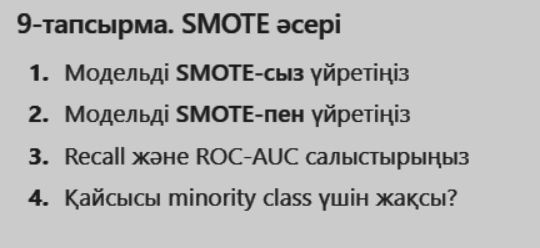

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

smote_model = LogisticRegression(max_iter=1000)
smote_model.fit(X_train_res, y_train_res)

y_pred_smote = smote_model.predict(X_test)
smote_recall = recall_score(y_test, y_pred_smote)
smote_auc = roc_auc_score(y_test, smote_model.predict_proba(X_test)[:, 1])

print("\n" + "="*40)
print(f"{'Metric':<15} | {'Base':<10} | {'With SMOTE':<10}")
print("-" * 40)
print(f"{'Recall':<15} | {rec:<10.4f} | {smote_recall:<10.4f}")
print(f"{'ROC-AUC':<15} | {base_auc:<10.4f} | {smote_auc:<10.4f}")
print("="*40)

print("\nFull Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))


Metric          | Base       | With SMOTE
----------------------------------------
Recall          | 0.6727     | 0.7091    
ROC-AUC         | 0.8129     | 0.8130    

Full Report (SMOTE):
              precision    recall  f1-score   support

           0       0.81      0.69      0.74        99
           1       0.56      0.71      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154



OC-AUC показывает общую способность модели разделять классы, независимо от порога вероятности. То, что он остался прежним, говорит о том, что:

SMOTE не добавил новой магической информации в данные (он же синтетический).

Он просто "перенастроил" модель, чтобы она сместила фокус на меньшинство.

## Task 10
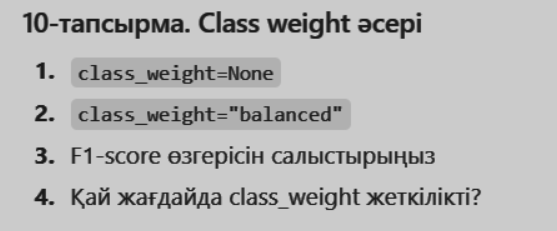

class_weight formula: $W_j = \frac{n\_samples}{n\_classes \cdot n\_samples_j}$

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) # stratify - пропоцияны сактау ушин

weighted_model = LogisticRegression(max_iter=1000, class_weight='balanced')
weighted_model.fit(X_train, y_train)
y_pred_weighted = weighted_model.predict(X_test)

In [20]:
results = {
    "Base Model": {
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, base_model.predict_proba(X_test)[:, 1])
    },
    "With SMOTE": {
        "Recall": recall_score(y_test, y_pred_smote),
        "F1-score": f1_score(y_test, y_pred_smote),
        "ROC-AUC": roc_auc_score(y_test, smote_model.predict_proba(X_test)[:, 1])
    },
    "With Class Weight": {
        "Recall": recall_score(y_test, y_pred_weighted),
        "F1-score": f1_score(y_test, y_pred_weighted),
        "ROC-AUC": roc_auc_score(y_test, weighted_model.predict_proba(X_test)[:, 1])
    }
}

# Results of a models
print("\n" + "="*60)
print(f"{'Teaching Method':<20} | {'Recall':<10} | {'F1-score':<10} | {'ROC-AUC':<10}")
print("-" * 60)

for name, metrics in results.items():
    print(f"{name:<20} | {metrics['Recall']:<10.4f} | {metrics['F1-score']:<10.4f} | {metrics['ROC-AUC']:<10.4f}")
print("="*60)


# Full Report (Tasks 8, 9, 10)

print("\nFull Report (BASE):")
print(classification_report(y_test, y_pred))

print("\nFull Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))

print("\nFull Report (Class Weight):")
print(classification_report(y_test, y_pred_weighted))


Teaching Method      | Recall     | F1-score   | ROC-AUC   
------------------------------------------------------------
Base Model           | 0.3889     | 0.3750     | 0.8213    
With SMOTE           | 0.4815     | 0.4194     | 0.8219    
With Class Weight    | 0.7222     | 0.6610     | 0.8244    

Full Report (BASE):
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       100
           1       0.36      0.39      0.38        54

    accuracy                           0.55       154
   macro avg       0.51      0.51      0.51       154
weighted avg       0.55      0.55      0.55       154


Full Report (SMOTE):
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       100
           1       0.37      0.48      0.42        54

    accuracy                           0.53       154
   macro avg       0.52      0.52      0.51       154
weighted avg       0.56      0.53      0.54       154




Неге class_weight коберик комек тести?

SMOTE -  бул бизде генерация данных, синтексируюет, сол ушин биздин болинетин границамыз бир-биримин араласып кетуи мумкин. Ал `class_weight` жай гана **loss function**-да штравты еки есе жагарлатады.

## Task 11
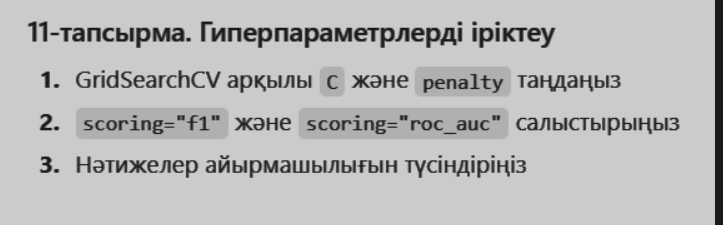

In [25]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # have L1 and L2
}

model_to_tune = LogisticRegression(class_weight='balanced', max_iter=1000)

grid_f1 = GridSearchCV(model_to_tune, param_grid, scoring='f1', cv=5)
grid_f1.fit(X_train, y_train)

grid_auc = GridSearchCV(model_to_tune, param_grid, scoring='roc_auc', cv=5)
grid_auc.fit(X_train, y_train)

print(f"Best params (F1): {grid_f1.best_params_} \nScore: {grid_f1.best_score_:.4f}\n")
print(f"Best params (AUC): {grid_auc.best_params_} \nScore: {grid_auc.best_score_:.4f}")

Best params (F1): {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'} 
Score: 0.6838

Best params (AUC): {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'} 
Score: 0.8311


**f1** - `recall` мен `precision` арасындагы балансты издейди. 

**roc-auc** - Общий (Толык) кабилиттилигин издейди, кластырадын айырмашылагына караймай, модельдин оларды каншалыкты боле алатына карайда.

## Task 12 
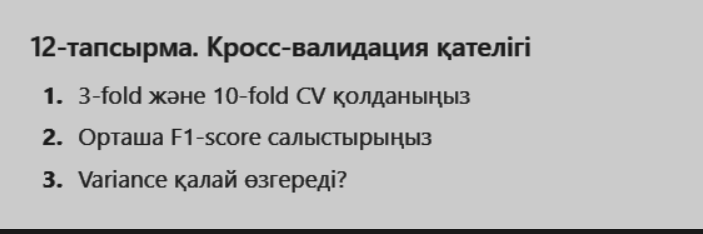

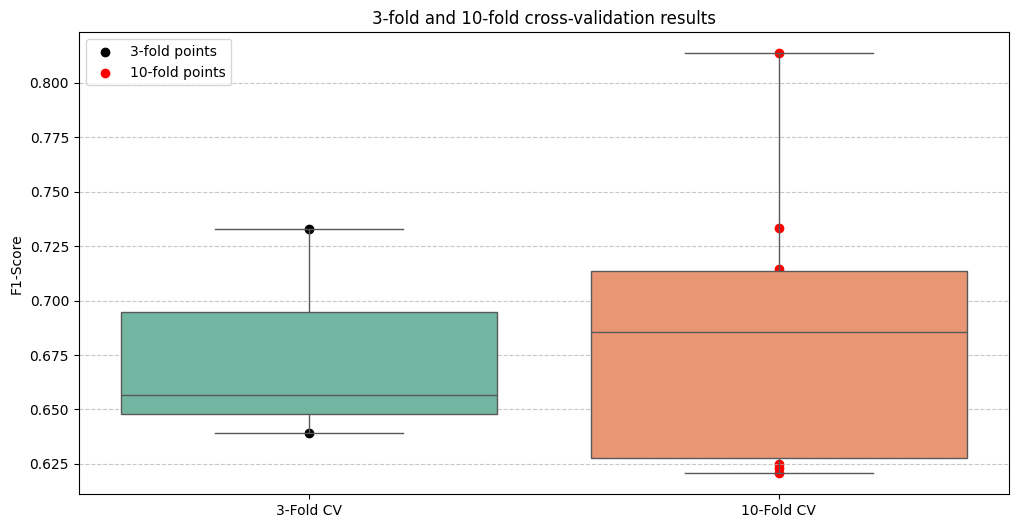

3-Fold F1: 0.6763 (+/- 0.0407)
10-Fold F1: 0.6848 (+/- 0.0588)


In [26]:
from sklearn.model_selection import cross_val_score

final_model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', class_weight='balanced')

f1_3fold = cross_val_score(final_model, X, y, cv=3, scoring='f1')
f1_10fold = cross_val_score(final_model, X, y, cv=10, scoring='f1')


plt.figure(figsize=(12, 6))

sns.boxplot(data=[f1_3fold, f1_10fold], palette="Set2")
plt.xticks([0, 1], ['3-Fold CV', '10-Fold CV'])
plt.ylabel('F1-Score')
plt.title('3-fold and 10-fold cross-validation results')

plt.scatter([0]*3, f1_3fold, color='black', label='3-fold points')
plt.scatter([1]*10, f1_10fold, color='red', label='10-fold points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print(f"3-Fold F1: {f1_3fold.mean():.4f} (+/- {f1_3fold.std():.4f})")
print(f"10-Fold F1: {f1_10fold.mean():.4f} (+/- {f1_10fold.std():.4f})")

## Task 13 
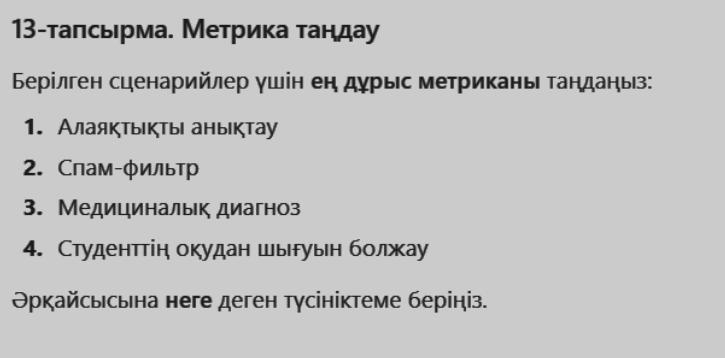

 1. **Алаяқтықты анықтау (Fraud Detection):**

*Метрика: Recall немесе Precision-Recall AUC.*

Себебі: Алаяқтықты өткізіп алмау (Recall) өте маңызды, себебі бір өткізіп алынған алаяқтық үлкен шығынға әкелуі мүмкін.

 2. **Спам-фильтр:**

*Метрика: Precision.*

Себебі: Мұнда маңызды хатты қателесіп «спам» деп белгілемеу керек. Пайдаланушы үшін маңызды хаттың жоғалуы спам хаттың «Inbox»-қа түсуінен әлдеқайда нашар.

 3. **Медициналық диагноз:**

*Метрика: Recall.*

Себебі: Ауруды өткізіп алудың қаупі өте жоғары. Науқас адамға «сау» (False Negative) деп диагноз қоюдың соңы өлімге әкелуі мүмкін, сондықтан Recall барынша жоғары болуы тиіс.

 4. **Студенттің оқудан шығуын болжау:**

*Метрика: F1-score.*

Себебі: Мұнда екі жақты баланс керек: көмекке мұқтаж студенттерді барынша көбірек анықтау (Recall) және сонымен қатар университеттің шектеулі ресурстарын дұрыс бағыттау үшін қате болжамдарды азайту (Precision) қажет.